In [1]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt # data visualization
import seaborn as sns

In [2]:
exp_name = 'default_0'

cate2cnt = {}
with open('../data/book14_data/book14_cate_map.txt', 'r') as f:
    for line in f:
        conts = line.strip().split(',')
        cate2cnt[int(conts[-2])] = int(conts[-1])
cate2cnt[1] = 136555
        
item2cate = {}
with open('../data/book14_data/book14_item_cate.txt', 'r') as f:
    for line in f:
        conts = line.strip().split(',')
        item2cate[conts[0]] = conts[1]
        

info_path = exp_name + '_info.txt'
intere_cate_cnt = np.zeros([400,591], dtype=float)
intere_set = set()

with open(info_path, 'r') as f:
    for line in f:
        conts = line.strip().split(',')
        user = conts[0]
        intere = int(conts[1])     
        intere_set.add(intere)
        for i in range(2,52):
            item = conts[i]
            if item in item2cate:
                cate = int(item2cate[item])
            else:
                cate = 1
            intere_cate_cnt[intere][cate] += 1

In [3]:
intere_list = list(intere_set)
intere_num = len(intere_list)
print('intere_num : {}'.format(intere_num))

intere_num : 12


In [4]:
intere_list

[0, 1, 3, 4, 36, 6, 8, 9, 42, 12, 52, 28]

### 不删除无标签图书

In [5]:
draw_info = intere_cate_cnt[intere_list]
draw_info /= np.sum(draw_info, axis=1, keepdims = True)

In [6]:
draw_info[:,1]

array([0.42324997, 0.41819903, 0.4226087 , 0.42306496, 0.38712177,
       0.44956522, 0.4273913 , 0.43782609, 0.42738286, 0.38859779,
       0.37859779, 0.38704797])

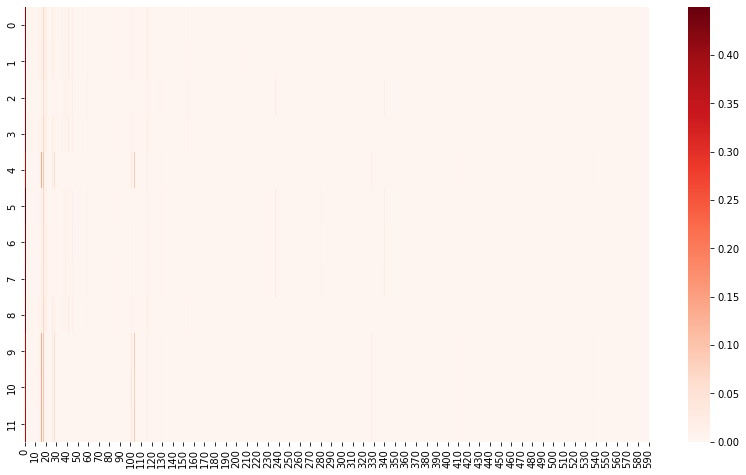

In [7]:
max_num = np.max(draw_info)
plt.figure(figsize=(14, 8))# 定义输出图像大小
#annot参数决定是否在热力图上显示数值Vmax,Vmin表示最大最小值，cmap表示颜色
sns.heatmap(draw_info, fmt='.0f', annot=False, vmin=0, vmax=max_num,
            cmap='Reds')#, yticklabels=y_label, xticklabels=x_label)
plt.show()

### 删除无标签图书

In [8]:
draw_info = intere_cate_cnt[intere_list]
for i in range(intere_num):
    draw_info[i][1]=0

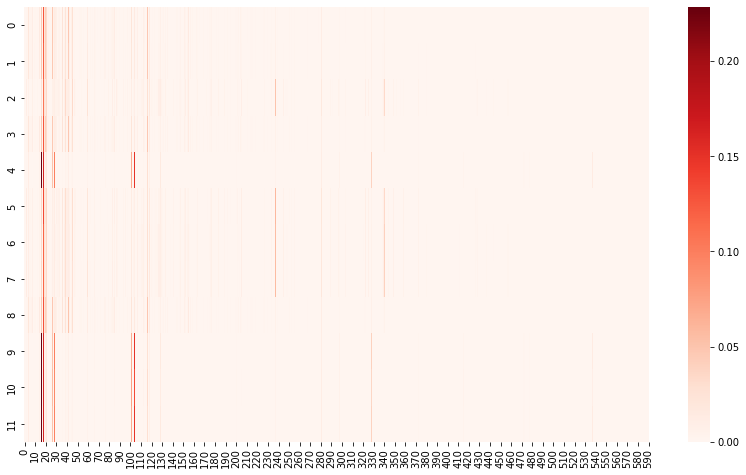

In [9]:
draw_info /= np.sum(draw_info, axis=1, keepdims = True)
max_num = np.max(draw_info)
plt.figure(figsize=(14, 8))# 定义输出图像大小
#annot参数决定是否在热力图上显示数值Vmax,Vmin表示最大最小值，cmap表示颜色
sns.heatmap(draw_info, fmt='.0f', annot=False, vmin=0, vmax=max_num,
            cmap='Reds')#, yticklabels=y_label, xticklabels=x_label)
plt.show()

### 考虑每个类别的总量

In [10]:
draw_info = intere_cate_cnt[intere_list]
for i in range(intere_num):
    for j in range(1,591):
        draw_info[i][j] /= cate2cnt[j]

In [11]:
draw_info /= np.sum(draw_info, axis=1, keepdims = True)
max_num = np.max(draw_info)

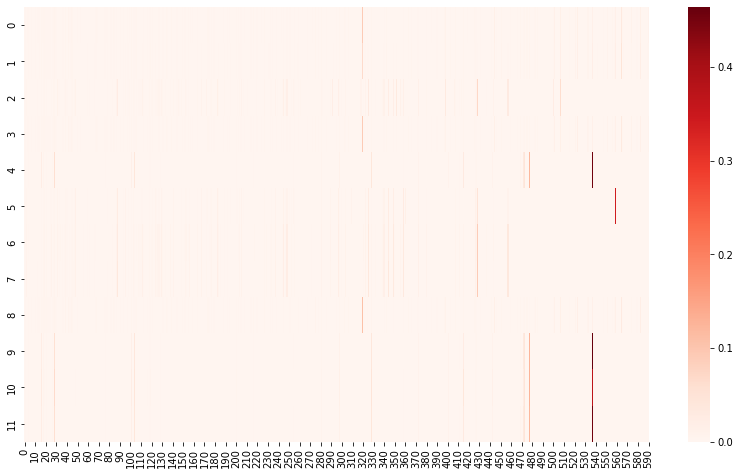

In [12]:
plt.figure(figsize=(14, 8))# 定义输出图像大小
#annot参数决定是否在热力图上显示数值Vmax,Vmin表示最大最小值，cmap表示颜色
sns.heatmap(draw_info, fmt='.0f', annot=False, vmin=0, vmax=max_num,
            cmap='Reds')#, yticklabels=y_label, xticklabels=x_label)
plt.savefig('./img/{}.png'.format(exp_name))
plt.show()